# Machine Learning Project Template
* This notebook provides a structured template for building an end-to-end machine learning project.
* Re-use this notebook througout your learning and in capstone project

## <b> <font color=green> STEP (1) Problem Definition, Scoping & Framing </font> </b>

### 1.1) Load Libraries
Import all necessary libraries for the project.

In [1]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from textblob import TextBlob

### 1.2) Load The Dataset
Load the dataset and display the first few rows.

In [3]:
movie_df = pd.read_csv('rotten_tomatoes_movies.csv')

In [4]:
movie_df.head()


rotten_tomatoes_link  \
0                              m/0814255   
1                              m/0878835   
2                                   m/10   
3                 m/1000013-12_angry_men   
4  m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   
3  Following the closing arguments in a murder tr...   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Nicole Holofcener's newest might seem slight i...              R   
2  Blake Edwards' bawdy comedy may not score a pe...              R   
3  Sidney Lumet's feature debut is a superbly wri...             NR   
4  One of Disney's finest live-action adventures,...              G   

                                              genres          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1                           Nicole Holofcener   
2                               Blake Edwards   
3                               Reginald Rose   
4                                 Earl Felton   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...             2/12/2010   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...             4/30/2010   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...             10/5/1979   
3  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....             4/13/1957   
4  James Mason, Kirk Douglas, Paul Lukas, Peter L...              1/1/1954   

   ...      production_company  tomatometer_status tomatometer_rating  \
0  ...        20th Century Fox              Rotten               49.0   
1  ...  Sony Pictures Classics     Certified-Fresh               87.0   
2  ...             Waner Bros.               Fresh               67.0   
3  ...    Criterion Collection     Certified-Fresh              100.0   
4  ...                  Disney               Fresh               89.0   

  tomatometer_count  audience_status  audience_rating audience_count  \
0             149.0          Spilled             53.0       254421.0   
1             142.0          Upright             64.0        11574.0   
2              24.0          Spilled             53.0        14684.0   
3              54.0          Upright             97.0       105386.0   
4              27.0          Upright             74.0        68918.0   

   tomatometer_top_critics_count  tomatometer_fresh_critics_count  \
0                             43                               73   
1                             44                              123   
2                              2                               16   
3                              6                               54   
4                              5                               24   

   tomatometer_rotten_critics_count  
0                                76  
1                                19  
2                                 8  


In [5]:
movie_df.shape

(17711, 22)

In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17711 entries, 0 to 17710
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17711 non-null  object 
 1   movie_title                       17711 non-null  object 
 2   movie_info                        17390 non-null  object 
 3   critics_consensus                 9133 non-null   object 
 4   content_rating                    17711 non-null  object 
 5   genres                            17692 non-null  object 
 6   directors                         17517 non-null  object 
 7   authors                           16169 non-null  object 
 8   actors                            17359 non-null  object 
 9   original_release_date             16545 non-null  object 
 10  streaming_release_date            17327 non-null  object 
 11  runtime                           17397 non-null  float64
 12  prod

## <b> <font color=green> STEP (2) Data Exploration & Understanding </font> </b>

### 2.1) Descriptive Statistics
Generate summary statistics for the dataset.

In [7]:
print("Numrical Feature Summary:")
movie_df.describe()

Numrical Feature Summary:


runtime  tomatometer_rating  tomatometer_count  audience_rating  \
count  17397.000000        17667.000000        17667.00000     17415.000000   
mean     102.213715           60.884587           57.14179        60.555154   
std       18.702997           28.444143           68.37147        20.543621   
min        5.000000            0.000000            5.00000         0.000000   
25%       90.000000           38.000000           12.00000        45.000000   
50%       99.000000           67.000000           28.00000        63.000000   
75%      111.000000           86.000000           75.00000        78.000000   
max      266.000000          100.000000          574.00000       100.000000   

       audience_count  tomatometer_top_critics_count  \
count    1.741400e+04                   17711.000000   
mean     1.439477e+05                      14.587036   
std      1.763628e+06                      15.146481   
min      5.000000e+00                       0.000000   
25%      7.072500e+02                       3.000000   
50%      4.277000e+03                       8.000000   
75%      2.498950e+04                      23.000000   
max      3.579764e+07                      69.000000   

       tomatometer_fresh_critics_count  tomatometer_rotten_critics_count  
count                     17711.000000                      17711.000000  
mean                         36.376094                         20.703856  
std                          52.602254                         30.249138  
min                           0.000000                          0.000000  
25%                           6.000000                          3.000000  
50%                          16.000000                          8.000000  
75%                          44.000000                         24.000000  
max                         497.000000                        303.000000

In [8]:
print("\nMissing Values:")
missing_data = movie_df.isnull().sum()
missing_precent = (missing_data / len(movie_df)) * 100
M_df = pd.DataFrame({
    'Missing Count' : missing_data,
    'Missing Precentage' : missing_precent
}).sort_values('Missing Precentage', ascending = False)
print(M_df[M_df['Missing Count'] > 0])



Missing Values:
                        Missing Count  Missing Precentage
critics_consensus                8578           48.433177
authors                          1542            8.706454
original_release_date            1166            6.583479
production_company                499            2.817458
audience_status                   448            2.529501
streaming_release_date            384            2.168144
actors                            352            1.987465
movie_info                        321            1.812433
runtime                           314            1.772909
audience_count                    297            1.676924
audience_rating                   296            1.671278
directors                         194            1.095364
tomatometer_status                 44            0.248433
tomatometer_rating                 44            0.248433
tomatometer_count                  44            0.248433
genres                             19            0.1072

In [9]:
print("\nTomatometer Status Distribution:")
print(movie_df['tomatometer_status'].value_counts())


Tomatometer Status Distribution:
tomatometer_status
Rotten             7565
Fresh              6843
Certified-Fresh    3259
Name: count, dtype: int64


In [10]:
num_cols = movie_df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nNumerical Features:{list(num_cols)}")

for col in num_cols[:5]:
    print(f"\n {col} - Unique Values:{movie_df[col].nunique()}")
    print(movie_df[col].value_counts().head())


Numerical Features:['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']

 runtime - Unique Values:190
runtime
90.0     834
95.0     603
100.0    540
93.0     539
96.0     511
Name: count, dtype: int64

 tomatometer_rating - Unique Values:101
tomatometer_rating
100.0    964
50.0     438
88.0     408
67.0     396
83.0     396
Name: count, dtype: int64

 tomatometer_count - Unique Values:407
tomatometer_count
5.0    793
6.0    728
7.0    666
8.0    595
9.0    532
Name: count, dtype: int64

 audience_rating - Unique Values:98
audience_rating
71.0    323
72.0    321
75.0    319
79.0    313
78.0    304
Name: count, dtype: int64

 audience_count - Unique Values:11068
audience_count
5.0     24
11.0    22
6.0     20
71.0    19
7.0     18
Name: count, dtype: int64


In [11]:
cat_cols = movie_df.select_dtypes(include=['object']).columns
print(f"\nCategorical Features:{list(cat_cols)}")

for col in cat_cols[:5]:
    print(f"\n {col} - Unique Values:{movie_df[col].nunique()}")
    print(movie_df[col].value_counts().head())


Categorical Features:['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company', 'tomatometer_status', 'audience_status']

 rotten_tomatoes_link - Unique Values:17711
rotten_tomatoes_link
m/0814255                    1
m/phoenix_1998               1
m/phyllis_and_harold_2008    1
m/photographing_fairies      1
m/phone_booth                1
Name: count, dtype: int64

 movie_title - Unique Values:17105
movie_title
Hamlet                  6
Home                    5
Alice in Wonderland     4
The Three Musketeers    4
Robin Hood              4
Name: count, dtype: int64

 movie_info - Unique Values:17388
movie_info
Wisecracking mercenary Deadpool meets Russell, an angry teenage mutant who lives at an orphanage. When Russell becomes the target of Cable -- a genetically enhanced soldier from the future -- Deadpool realizes that he'll need some

### 2.2) Data Visualizations
Visualize the data to identify patterns and relationships.

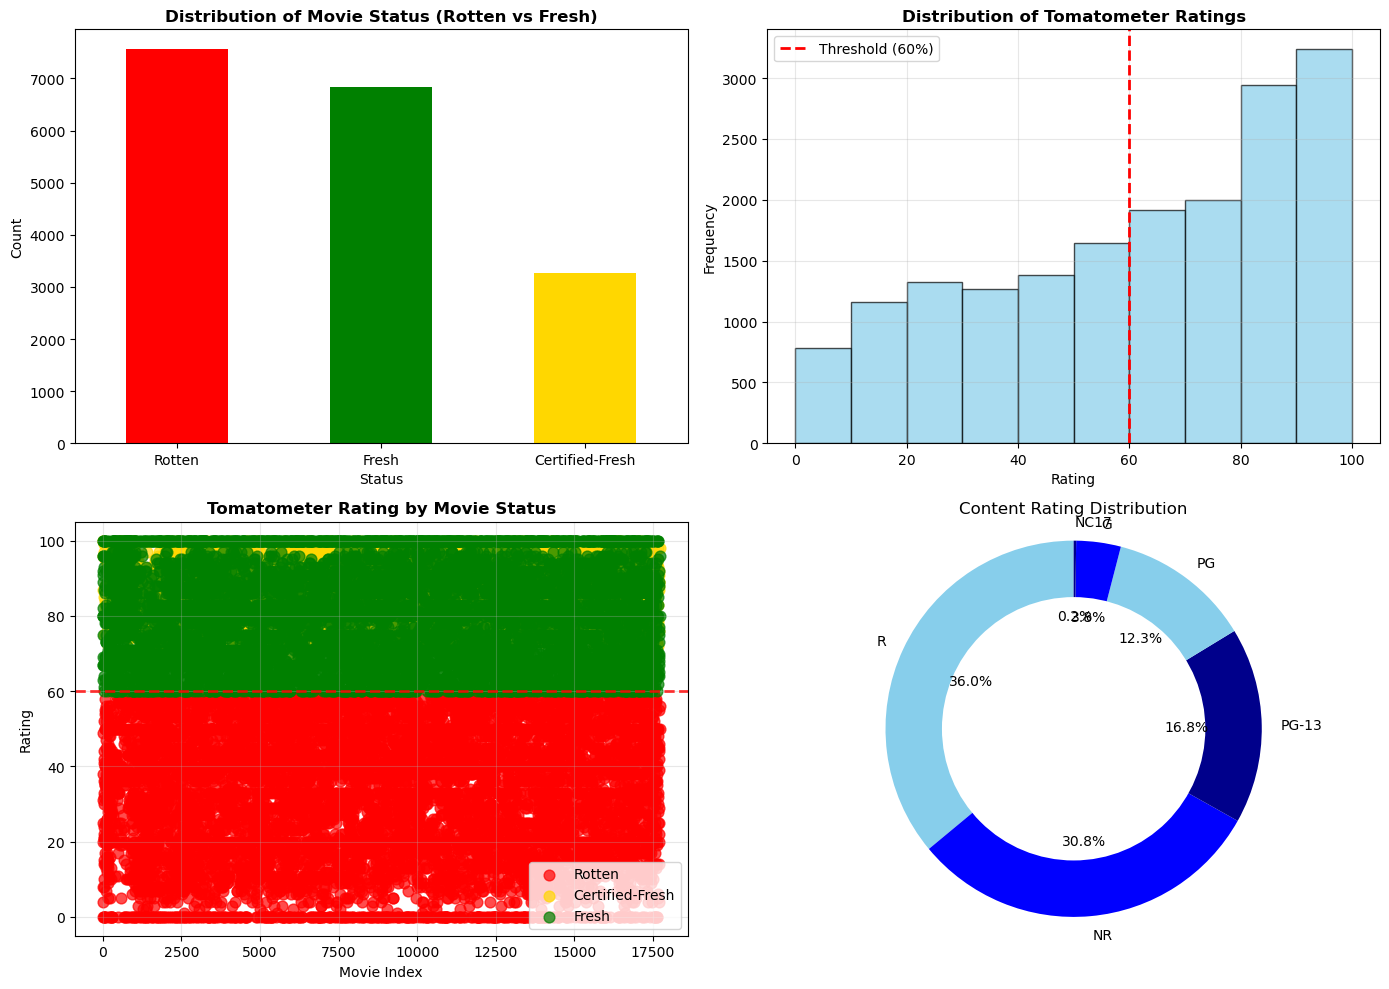

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def create_visualizations(movie_df):
    # Drop missing values for the required columns
    movie_df = movie_df.copy()
    movie_df = movie_df.dropna(subset=['tomatometer_status', 'tomatometer_rating'])

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Bar plot: Distribution of Movie Status
    status_counts = movie_df['tomatometer_status'].value_counts()
    status_colors = ['red', 'green', 'gold']
    status_counts.plot(kind='bar', ax=axes[0, 0], color=status_colors[:len(status_counts)])
    axes[0, 0].set_title('Distribution of Movie Status (Rotten vs Fresh)', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Status')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].tick_params(axis='x', rotation=0)

    # Histogram: Tomatometer Ratings
    movie_df['tomatometer_rating'].hist(bins=10, ax=axes[0, 1], alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].axvline(x=60, color='red', linestyle='--', linewidth=2, label='Threshold (60%)')
    axes[0, 1].set_title('Distribution of Tomatometer Ratings', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Rating')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Scatter Plot: Rating by Status
    colors_map = {
        'Fresh': 'green',
        'Rotten': 'red',
        'Certified-Fresh': 'gold'
    }
    for status in movie_df['tomatometer_status'].unique():
        subset = movie_df[movie_df['tomatometer_status'] == status]
        axes[1, 0].scatter(subset.index, subset['tomatometer_rating'], 
                           c=colors_map.get(status, 'gray'), label=status, s=60, alpha=0.7)
    axes[1, 0].axhline(y=60, color='red', linestyle='--', linewidth=2, alpha=0.8)
    axes[1, 0].set_title('Tomatometer Rating by Movie Status', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Movie Index')
    axes[1, 0].set_ylabel('Rating')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Optional: Pie chart for content_rating (if exists)
    if 'content_rating' in movie_df.columns:
        content_counts = movie_df['content_rating'].value_counts()
        blue_shades = ['skyblue', 'blue', 'darkblue']
        colors = (blue_shades * ((len(content_counts) // len(blue_shades)) + 1))[:len(content_counts)]
        axes[1, 1].pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', 
                      startangle=90, colors=colors)
        axes[1, 1].set_title('Content Rating Distribution')

        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        axes[1, 1].add_artist(centre_circle)
        axes[1, 1].axis('equal')
    else:
        axes[1, 1].axis('off')  # Hide if not used

    plt.tight_layout()
    plt.show()

create_visualizations(movie_df)

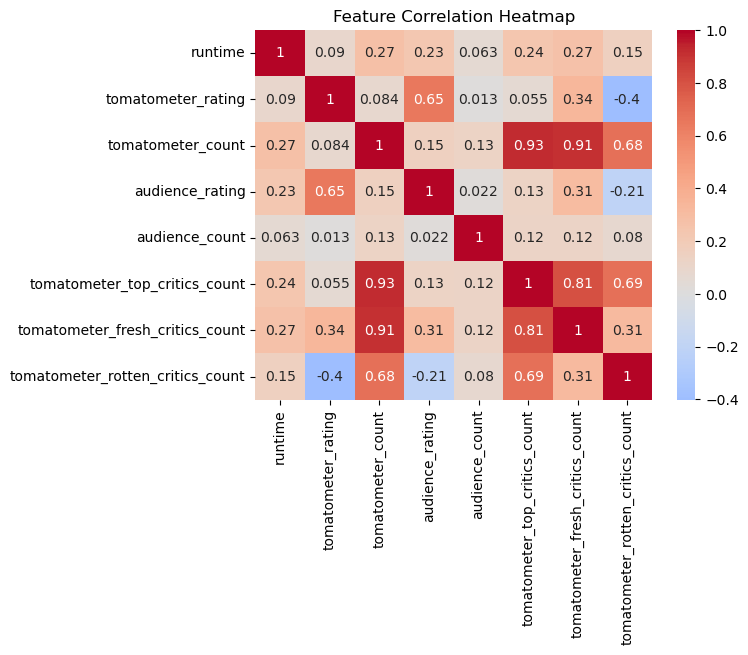

In [13]:
if len(num_cols) > 1:
    corr_matrix = movie_df[num_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.show()

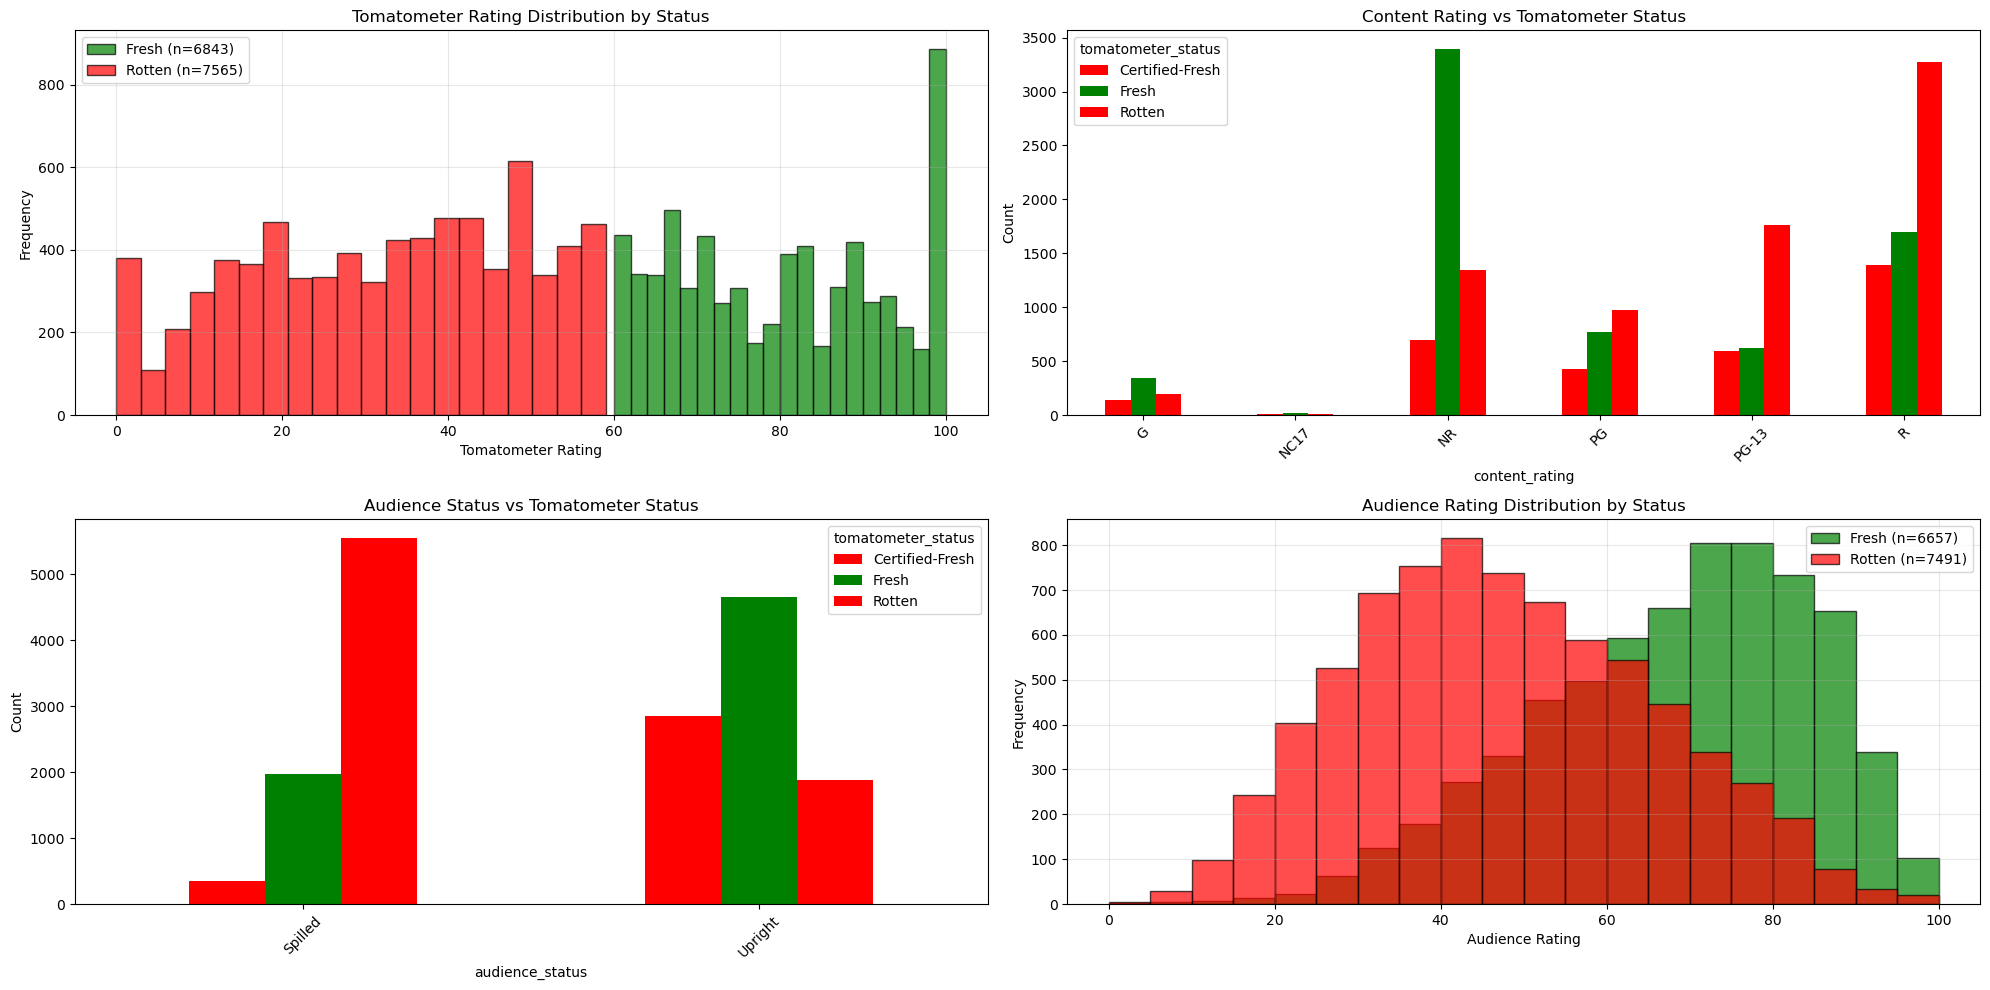

In [14]:
def analyze_key_features(movie_df):
    
    key_features = ['tomatometer_rating', 'content_rating', 'audience_status', 'audience_rating']
    
    if 'tomatometer_status' in movie_df.columns:
        df_fixed = movie_df.copy()
        
        if 'tomatometer_rating' in df_fixed.columns:
            if df_fixed['tomatometer_rating'].max() <= 1.0:
                df_fixed['tomatometer_rating'] = df_fixed['tomatometer_rating'] * 100
    
        if 'audience_rating' in df_fixed.columns:
            max_audience = df_fixed['audience_rating'].max()
            if max_audience <= 5.0:
                df_fixed['audience_rating'] = (df_fixed['audience_rating'] / max_audience) * 100
            elif max_audience <= 10.0:
                df_fixed['audience_rating'] = (df_fixed['audience_rating'] / 10) * 100
        
        plt.figure(figsize=(20, 10))
        
        for i, feature in enumerate(key_features, 1):
            if feature in df_fixed.columns:
                plt.subplot(2, 2, i)
                
                if feature in ['tomatometer_rating', 'audience_rating']:
                    fresh_mask = df_fixed['tomatometer_status'] == 'Fresh'
                    rotten_mask = df_fixed['tomatometer_status'] == 'Rotten'
                    
                    fresh_data = df_fixed[fresh_mask][feature].dropna()
                    rotten_data = df_fixed[rotten_mask][feature].dropna()
                    
                    if len(fresh_data) > 0:
                        plt.hist(fresh_data, alpha=0.7, label=f'Fresh (n={len(fresh_data)})', 
                                bins=20, color='green', edgecolor='black')
                    
                    if len(rotten_data) > 0:
                        plt.hist(rotten_data, alpha=0.7, label=f'Rotten (n={len(rotten_data)})', 
                                bins=20, color='red', edgecolor='black')
                    
                    plt.xlabel(feature.replace('_', ' ').title())
                    plt.ylabel('Frequency')
                    plt.title(f'{feature.replace("_", " ").title()} Distribution by Status')
                    plt.legend()
                    plt.grid(True, alpha=0.3)
                    
                else:
                    cross_tab = pd.crosstab(df_fixed[feature], df_fixed['tomatometer_status'])
                    cross_tab.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
                    plt.title(f'{feature.replace("_", " ").title()} vs Tomatometer Status')
                    plt.xticks(rotation=45)  # Fixed the syntax error
                    plt.ylabel('Count')
                    
        plt.tight_layout()
        plt.show()
    
    else:
        print("ERROR: 'tomatometer_status' column not found in dataframe")
        print("Available columns:", df.columns.tolist())
analyze_key_features(movie_df)

## <b> <font color=green> STEP (3) Data Preparation & Feature Engineering </font> </b>

### 3.1) Data Cleaning
Handle missing values and outliers.

In [15]:
numerical_cols = ['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
print(movie_df[numerical_cols].isnull().sum())

runtime                             314
tomatometer_rating                   44
tomatometer_count                    44
audience_rating                     296
audience_count                      297
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
dtype: int64


In [16]:
numerical_cols = movie_df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    if movie_df[col].isnull().sum() > 0:
        movie_df[col] = movie_df[col].fillna(0)
        print(f"Filled {col} missing values with 0")

Filled runtime missing values with 0
Filled tomatometer_rating missing values with 0
Filled tomatometer_count missing values with 0
Filled audience_rating missing values with 0
Filled audience_count missing values with 0


In [17]:
print(movie_df[numerical_cols].isnull().sum())

runtime                             0
tomatometer_rating                  0
tomatometer_count                   0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64


- Numerical Features:['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


- Categorical Features:['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company', 'tomatometer_status', 'audience_status']


In [18]:
def feature_eng ( movie_df):
    if 'tomatometer_status' in movie_df.columns:
        movie_df['target'] = (movie_df['tomatometer_status'] == 'Fresh').astype(int)
        movie_df['tomatometer_status'] = movie_df['tomatometer_status'].replace('Certified-Fresh', 'Fresh')
        print("Created binary target variable")

    if 'runtime' in movie_df.columns:
        movie_df['runtime_cat'] = pd.cut(movie_df['runtime'],
                                         bins=[0, 90, 120, 180, 300],
                                         labels=['Short', 'Mediam', 'Long', 'Vary_long'])
        print("Created runtime categories")

    if 'genres' in movie_df.columns:
        genre_clean = movie_df['genres'].str.get_dummies(sep=',')
        movie_df = pd.concat([movie_df, genre_clean.add_prefix('genre_')], axis=1)
        print(f"Created {len(genre_clean.columns)} genre features")

    if 'content_rating' in movie_df.columns:
        C_rating = { 'G':1, 'PG':2, 'PG-13':3, 'R':4, 'NC-17':5}
        movie_df['content_rating_encoded'] = movie_df['content_rating'].map(C_rating).fillna(0)
        print("Encoded content rating")

    if 'audience_status' in movie_df.columns:
        movie_df['audience_status_encoded'] = (movie_df['audience_status'] == 'Upright').astype(int)
        print("Encoded audiance status")
    

    if 'original_release_date' in movie_df.columns:
        movie_df['original_release_date'] = pd.to_datetime(movie_df['original_release_date'])
        movie_df['release_year'] = movie_df['original_release_date'].dt.year
        movie_df['release_month'] = movie_df['original_release_date'].dt.month
        movie_df['release_day_of_week'] = movie_df['original_release_date'].dt.dayofweek
        print("Extracted date features")

        return movie_df 


movie_df = feature_eng(movie_df)

Created binary target variable
Created runtime categories
Created 37 genre features
Encoded content rating
Encoded audiance status
Extracted date features


### 3.1) Feature Selection
Select the most relevant features for the model.

In [19]:
feature_columns = [
        'tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count',
        'audience_count', 'release_year', 'release_month', 'content_rating_encoded',
        'audience_status_encoded', 'tomatometer_top_critics_count',
        'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


X = movie_df[feature_columns]
y = movie_df['tomatometer_status']

print("Initial feature count:", len(feature_columns))
print("Selected features:", feature_columns)




Initial feature count: 12
Selected features: ['tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count', 'audience_count', 'release_year', 'release_month', 'content_rating_encoded', 'audience_status_encoded', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


In [20]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=90)
selector.fit(X)

mask = selector.get_support()

selected_feature = X.columns[mask].tolist()
print("Features that pass variance threshold:", selected_feature)
print(f"Number of features passing threshold: {len(selected_feature)}")


Features that pass variance threshold: ['tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count', 'audience_count', 'release_year', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
Number of features passing threshold: 9


In [21]:
print(y.value_counts(normalize=True))

tomatometer_status
Fresh     0.571801
Rotten    0.428199
Name: proportion, dtype: float64


In [22]:
X_y = pd.concat([X, y], axis=1)
X_y_clean = X_y.dropna()
X = X_y_clean.drop(columns=y.name)
y = X_y_clean[y.name]

### 3.2) Data Transforms
Apply transformations to prepare the data for modeling.

In [23]:
def data_transforms(X):
    preprocessor = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    print(" Created preprocessing pipeline with:")
    print("- Median imputation for missing values")
    print("- Standard scaling for normalization")
    
    return preprocessor

data_transforms(X)

 Created preprocessing pipeline with:
- Median imputation for missing values
- Standard scaling for normalization


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

## <b> <font color=green> STEP (4)  ML Model Selection & Evaluation </font> </b>

### 4.1) Split-out Validation Dataset
Split the dataset into training and validation sets.

In [51]:
def split_validation_dataset(X, y, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    print(f"Training target distribution: {y_train.value_counts().to_dict()}")
    print(f"Test target distribution: {y_test.value_counts().to_dict()}")
    
    return X_train, X_test, y_train, y_test


movie_df = split_validation_dataset(X, y)

Training set: 13210 samples
Test set: 3303 samples
Training target distribution: {'Fresh': 7484, 'Rotten': 5726}
Test target distribution: {'Fresh': 1871, 'Rotten': 1432}


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

feature_selector_model = RandomForestClassifier(random_state=42)
feature_selector_model.fit(X_train, y_train)

selector = SelectFromModel(feature_selector_model, prefit=True)
X_train_sel = selector.transform(X_train)
X_val_sel = selector.transform(X_val)
X_test_sel = selector.transform(X_test)


/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


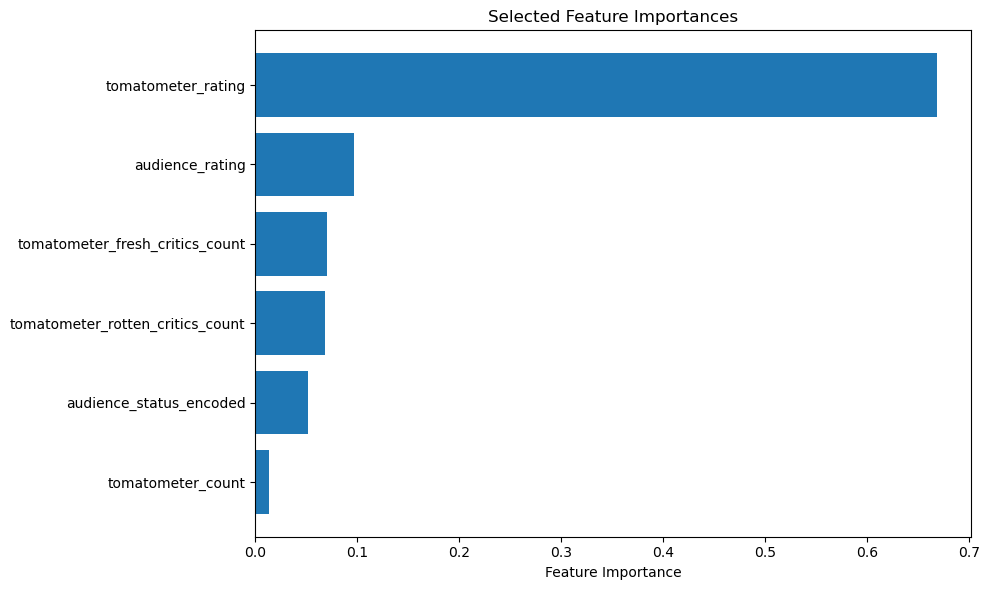

Selected features count: 6
Selected Features Mask: [ True  True False  True False False False False  True False  True  True]


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

feature_selector_model = RandomForestClassifier(random_state=42)
feature_selector_model.fit(X_train, y_train)

# Select features based on median importance threshold 
selector = SelectFromModel(feature_selector_model, threshold='median', prefit=True)

X_train_sel = selector.transform(X_train)
X_val_sel = selector.transform(X_val)
X_test_sel = selector.transform(X_test)

importances = feature_selector_model.feature_importances_
support_mask = selector.get_support()

selected_feature_names = np.array(X_train.columns)[support_mask]

sorted_idx = np.argsort(importances[support_mask])[::-1]
sorted_features = selected_feature_names[sorted_idx]
sorted_importances = importances[support_mask][sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Selected Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Selected features count: {support_mask.sum()}")

support_mask = selector.get_support()
print("Selected Features Mask:", support_mask)


In [27]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SGD Classifier": SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
}


Model: Logistic Regression
Validation Accuracy: 1.0000
Validation F1 Score: 1.0000
Validation ROC AUC: 1.0000

Model: Random Forest
Validation Accuracy: 1.0000
Validation F1 Score: 1.0000
Validation ROC AUC: 1.0000

Model: XGBoost
Validation Accuracy: 1.0000
Validation F1 Score: 1.0000
Validation ROC AUC: 1.0000

Model: SGD Classifier
Validation Accuracy: 0.9939
Validation F1 Score: 0.9930
Validation ROC AUC: 1.0000


/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


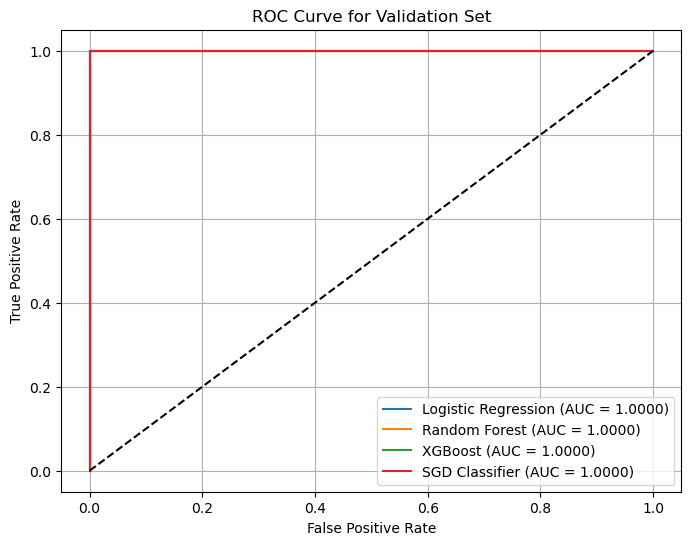

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    try:
        y_prob = model.predict_proba(X)[:, 1]
        roc_auc = roc_auc_score(y_true, y_prob)
        fpr, tpr, _ = roc_curve(y_true, y_prob)
    except AttributeError:
        roc_auc = None
        fpr, tpr = None, None
    return accuracy_score(y_true, y_pred), f1_score(y_true, y_pred), roc_auc, fpr, tpr

results = {}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_sel, y_train_enc)  # Fit the model first!
    acc, f1, auc, fpr, tpr = evaluate_model(model, X_val_sel, y_val_enc)
    results[name] = {'accuracy': acc, 'f1_score': f1, 'roc_auc': auc}
    print(f"\nModel: {name}")
    print(f"Validation Accuracy: {acc:.4f}")
    print(f"Validation F1 Score: {f1:.4f}")
    if auc is not None:
        print(f"Validation ROC AUC: {auc:.4f}")
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


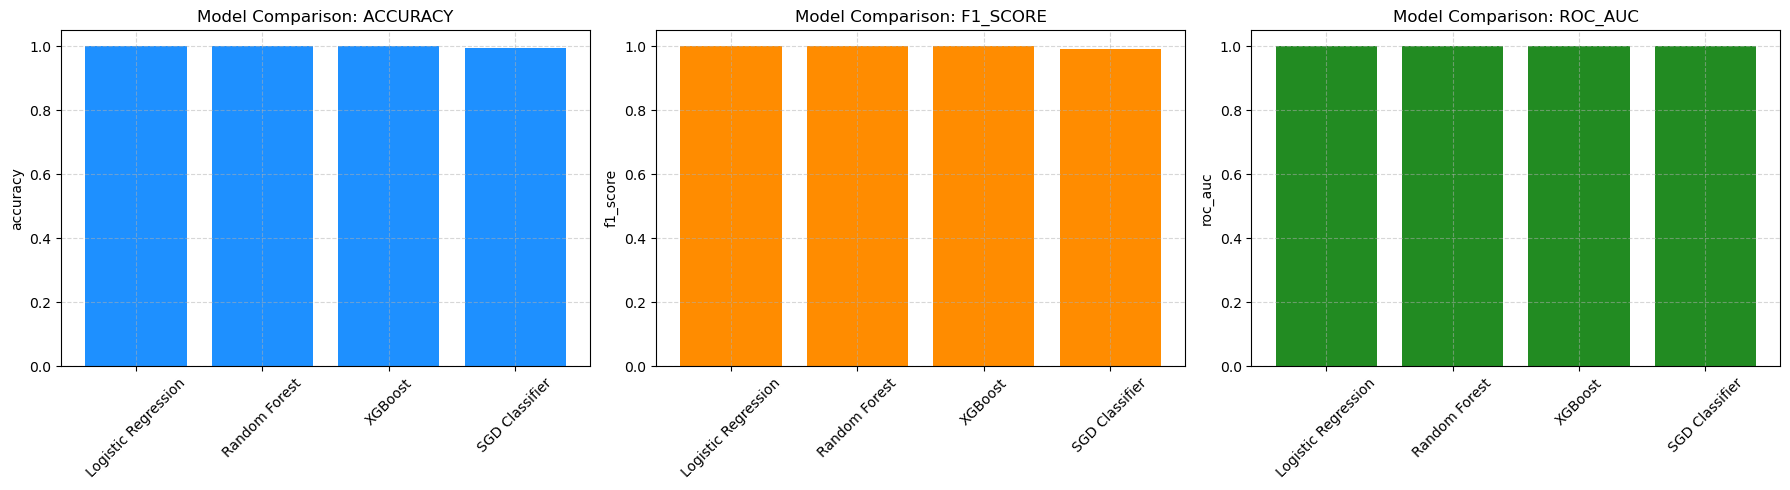

In [31]:
results_df = pd.DataFrame(results).T

plt.style.use('seaborn-v0_8-muted')
metrics = ['accuracy', 'f1_score', 'roc_auc']
colors = ['dodgerblue', 'darkorange', 'forestgreen']

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axs[i].bar(results_df.index, results_df[metric], color=colors[i])
    axs[i].set_title(f'Model Comparison: {metric.upper()}')
    axs[i].set_ylabel(metric)
    axs[i].set_ylim(0, 1.05)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 4.2) Test Options and Evaluation Metric
Define the evaluation metric for the model.

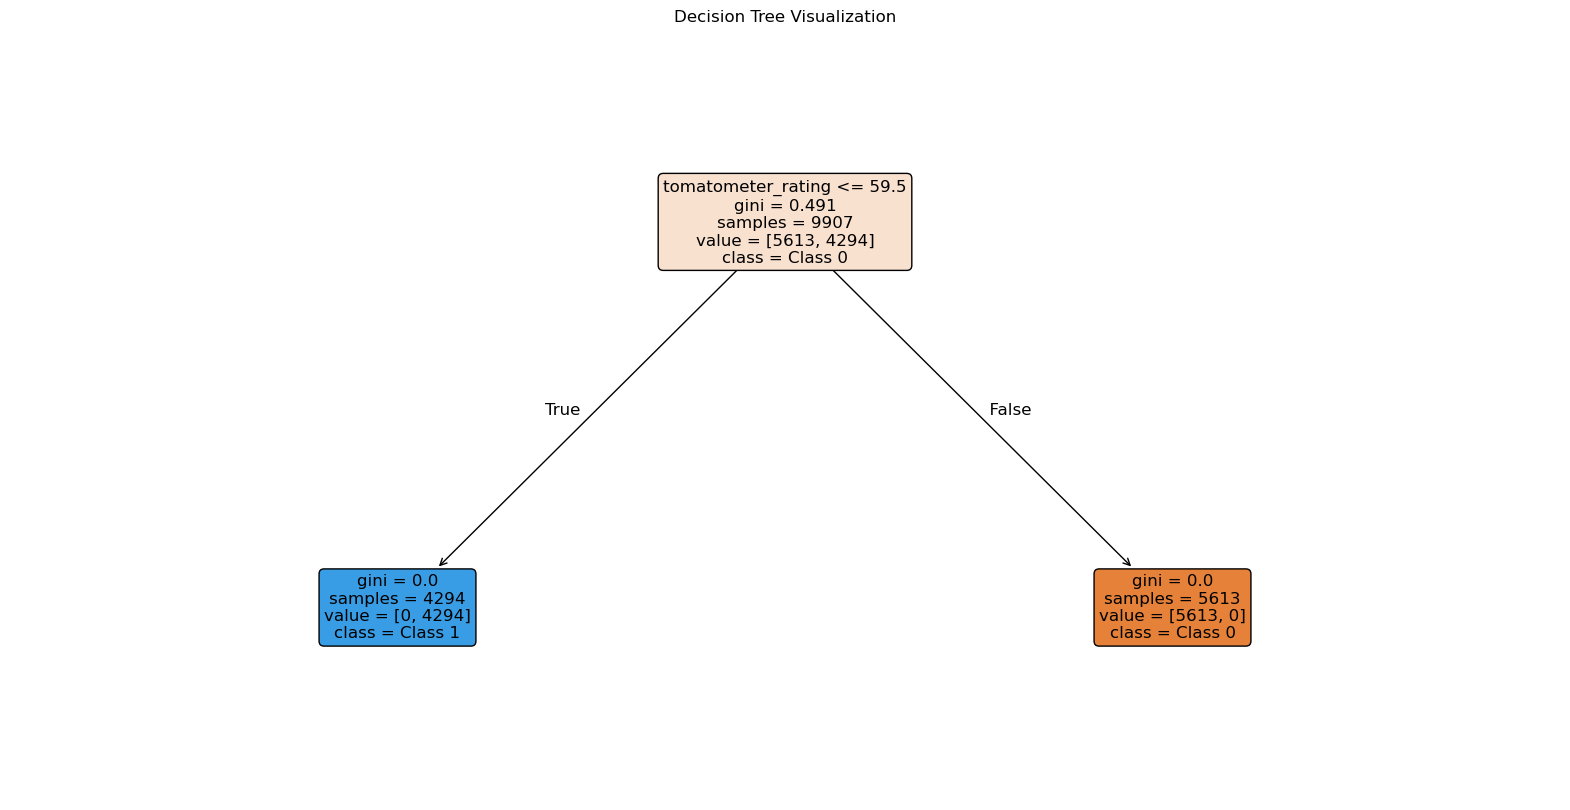

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a decision tree (or use your trained model)
dt_model = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_model.fit(X_train_sel, y_train_enc)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=selected_feature,
          class_names=['Class 0', 'Class 1'], 
          filled=True, 
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()


In [104]:
print(np.unique(y_test))


['Fresh' 'Rotten']



Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00      1871
      Rotten       1.00      1.00      1.00      1432

    accuracy                           1.00      3303
   macro avg       1.00      1.00      1.00      3303
weighted avg       1.00      1.00      1.00      3303



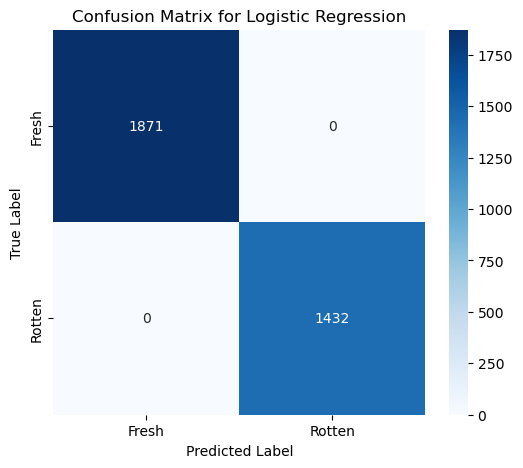


Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00      1871
      Rotten       1.00      1.00      1.00      1432

    accuracy                           1.00      3303
   macro avg       1.00      1.00      1.00      3303
weighted avg       1.00      1.00      1.00      3303



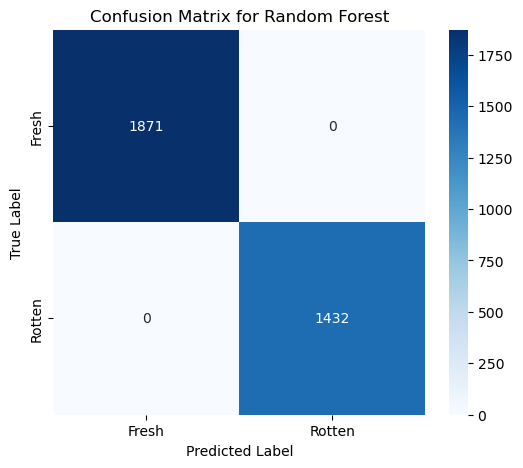


Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00      1871
      Rotten       1.00      1.00      1.00      1432

    accuracy                           1.00      3303
   macro avg       1.00      1.00      1.00      3303
weighted avg       1.00      1.00      1.00      3303



/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:23:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


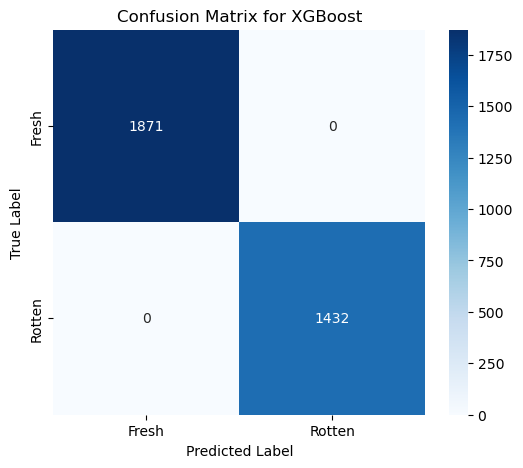


Model: SGD Classifier
Classification Report:
              precision    recall  f1-score   support

       Fresh       0.99      1.00      0.99      1871
      Rotten       1.00      0.99      0.99      1432

    accuracy                           0.99      3303
   macro avg       0.99      0.99      0.99      3303
weighted avg       0.99      0.99      0.99      3303



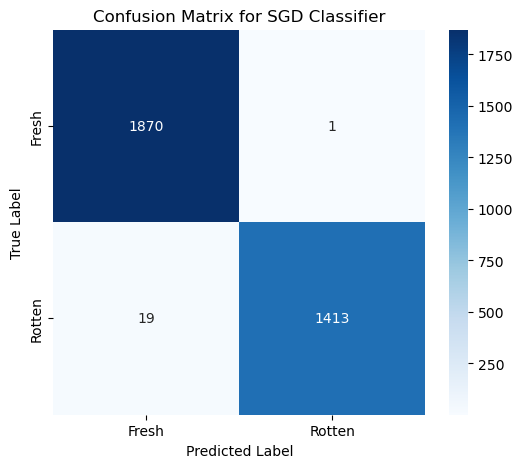

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

for name, model in models.items():
    model.fit(X_train_sel, y_train_enc)
    y_pred = model.predict(X_val_sel)
    
    # Confusion Matrix
    cm = confusion_matrix(y_val_enc, y_pred)
    
    # Classification report (includes precision, recall, f1-score, support, macro & weighted avg)
    report = classification_report(y_val_enc, y_pred, target_names=label_encoder.classes_, output_dict=True)
    
    print(f"\nModel: {name}")
    print("Classification Report:")
    print(classification_report(y_val_enc, y_pred, target_names=label_encoder.classes_))
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


### 4.3) Spot Check Algorithms
Test multiple algorithms to identify the best-performing one.

In [74]:
# Remove any nonexistent columns from cat_cols or num_cols
num_cols = [col for col in num_cols if col in X_train.columns]
cat_cols = [col for col in cat_cols if col in X_train.columns]

# Redefine preprocessor with verified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


missing_num = [col for col in num_cols if col not in X_train.columns]
missing_cat = [col for col in cat_cols if col not in X_train.columns]
print("Missing numerical columns:", missing_num)
print("Missing categorical columns:", missing_cat)

print("Preprocessing numeric columns:", num_cols)
print("Preprocessing categorical columns:", cat_cols)
print("X_train columns:", X_train.columns.tolist())



Missing numerical columns: []
Missing categorical columns: []
Preprocessing numeric columns: ['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
Preprocessing categorical columns: []
X_train columns: ['tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count', 'audience_count', 'release_year', 'release_month', 'content_rating_encoded', 'audience_status_encoded', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


In [93]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


def spot_check_algorithms(X_train, X_test, y_train, y_test, preprocessor):
    # Label encode y_train and y_test (for classifiers like XGBoost that require numeric labels)
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)
    
    algorithms = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "SGD Classifier": SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
    }
    
    results = {}
    
    for name, algorithm in algorithms.items():
        print(f"\nTesting {name}...")
        
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', algorithm)
        ])
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(pipeline, X_train, y_train_enc, cv=cv, scoring='accuracy')
        
        pipeline.fit(X_train, y_train_enc)
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
        
        accuracy = accuracy_score(y_test_enc, y_pred)
        precision = precision_score(y_test_enc, y_pred, average='weighted')
        recall = recall_score(y_test_enc, y_pred, average='weighted')
        f1 = f1_score(y_test_enc, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test_enc, y_pred_proba) if y_pred_proba is not None else None
        
        results[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'pipeline': pipeline,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        if roc_auc:
            print(f"ROC-AUC: {roc_auc:.4f}")
    
    print("\n" + "=" * 50)
    print("ALGORITHM COMPARISON")
    print("=" * 50)
    
    comparison_df = pd.DataFrame({
        'Algorithm': list(results.keys()),
        'CV Accuracy': [results[algo]['cv_mean'] for algo in results.keys()],
        'Test Accuracy': [results[algo]['accuracy'] for algo in results.keys()],
        'F1 Score': [results[algo]['f1'] for algo in results.keys()],
        'ROC-AUC': [results[algo]['roc_auc'] for algo in results.keys()]
    })
    
    print(comparison_df.round(4))
    
    best_algorithm = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Algorithm']
    print(f"\n Best Algorithm: {best_algorithm}")
    
    return results, best_algorithm


movie_df = spot_check_algorithms(X_train, X_test, y_train, y_test, preprocessor)


Testing Logistic Regression...
CV Accuracy: 0.9983 (+/- 0.0024)
Test Accuracy: 0.9994
F1 Score: 0.9994
ROC-AUC: 1.0000

Testing Random Forest...
CV Accuracy: 1.0000 (+/- 0.0000)
Test Accuracy: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000

Testing XGBoost...


/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [03:01:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [03:01:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [03:01:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [03:01:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xg

CV Accuracy: 1.0000 (+/- 0.0000)
Test Accuracy: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000

Testing SGD Classifier...
CV Accuracy: 0.9973 (+/- 0.0048)
Test Accuracy: 0.9979
F1 Score: 0.9979
ROC-AUC: 1.0000

ALGORITHM COMPARISON
             Algorithm  CV Accuracy  Test Accuracy  F1 Score  ROC-AUC
0  Logistic Regression       0.9983         0.9994    0.9994      1.0
1        Random Forest       1.0000         1.0000    1.0000      1.0
2              XGBoost       1.0000         1.0000    1.0000      1.0
3       SGD Classifier       0.9973         0.9979    0.9979      1.0

 Best Algorithm: Random Forest


## <b> <font color=green> STEP (5)  Performance Tuning & Optimization </font> </b>

### 5.1) Algorithm Tuning
Optimize hyperparameters for better performance.

ALGORITHM TUNING
Tuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best CV score: 1.0000


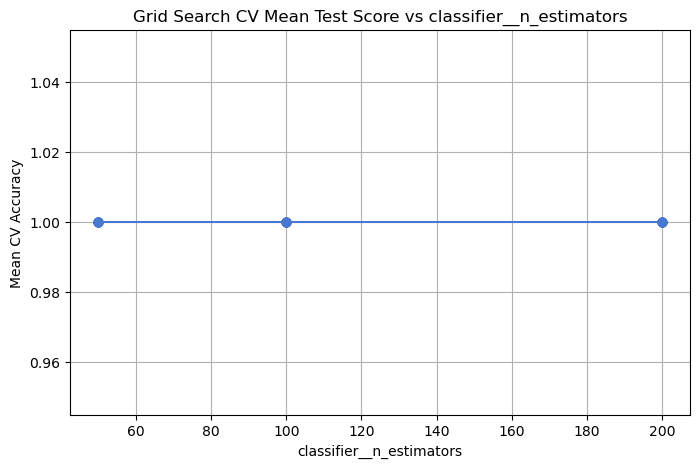

In [95]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def algorithm_tuning(best_algorithm, results, X_train, y_train, preprocessor):
    print("=" * 50)
    print("ALGORITHM TUNING")
    print("=" * 50)
    
    print(f"Tuning {best_algorithm}...")

    # Define param grids for your four algorithms
    param_grids = {
        'Logistic Regression': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['liblinear', 'lbfgs']
        },
        'Random Forest': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [3, 5, 7, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        },
        'XGBoost': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [3, 5, 7],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__subsample': [0.7, 0.8, 1.0]
        },
        'SGD Classifier': {
            'classifier__loss': ['log_loss', 'hinge'],
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__max_iter': [1000, 2000],
            'classifier__penalty': ['l2', 'l1', 'elasticnet']
        }
    }
    
    if best_algorithm not in param_grids:
        print(f"No parameter grid defined for {best_algorithm}. Skipping tuning.")
        return None
    
    base_pipeline = results[best_algorithm]['pipeline']
    param_grid = param_grids[best_algorithm]
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    grid_search = GridSearchCV(
        base_pipeline,
        param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit grid search - assuming y_train is label encoded if needed
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    
    return grid_search


# Plotting function remains the same
def plot_grid_search_results(grid_search, param_name):
    import matplotlib.pyplot as plt
    import pandas as pd
    
    results = pd.DataFrame(grid_search.cv_results_)
    scores = results[['param_' + param_name, 'mean_test_score']].sort_values(by='param_' + param_name)
    
    plt.figure(figsize=(8,5))
    plt.plot(scores['param_' + param_name], scores['mean_test_score'], marker='o')
    plt.title(f'Grid Search CV Mean Test Score vs {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Mean CV Accuracy')
    plt.grid(True)
    plt.show()

grid_search = algorithm_tuning(best_algorithm, results, X_train, y_train, preprocessor)
plot_grid_search_results(grid_search, 'classifier__n_estimators')



### 5.2) Ensembles
Combine multiple models to improve accuracy.

In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

def create_ensemble(results, X_train, y_train):
    estimators = []
    for key in ["Logistic Regression", "Random Forest", "XGBoost", "SGD Classifier"]:
        if key in results:
            estimators.append((key.replace(" ", "_").lower(), results[key]['pipeline']))
    
    voting_clf = VotingClassifier(estimators=estimators, voting='soft')
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, scoring='accuracy')
    
    print(f"Ensemble CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Fit the ensemble on the whole training data before returning it
    voting_clf.fit(X_train, y_train)
    
    return voting_clf

ensemble_model = create_ensemble(results, X_train, y_train)


/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [03:04:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [03:04:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [03:04:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [03:04:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xg

Ensemble CV Accuracy: 1.0000 (+/- 0.0000)


/home/Hibatullah.saleh2000/.local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [03:04:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## <b> <font color=green> STEP (6) Results Interpretation & Deployment </font> </b>

### 6.1) Predictions on Validation Dataset
Make predictions using the validation dataset.

FINAL MODEL PERFORMANCE:
Accuracy: 0.9664
Precision: 0.9664
Recall: 0.9664
F1 Score: 0.9664
ROC-AUC: 0.9963

Detailed Classification Report:
              precision    recall  f1-score   support

       Fresh       0.97      0.97      0.97      1871
      Rotten       0.96      0.96      0.96      1432

    accuracy                           0.97      3303
   macro avg       0.97      0.97      0.97      3303
weighted avg       0.97      0.97      0.97      3303


Confusion Matrix:
[[1813   58]
 [  53 1379]]


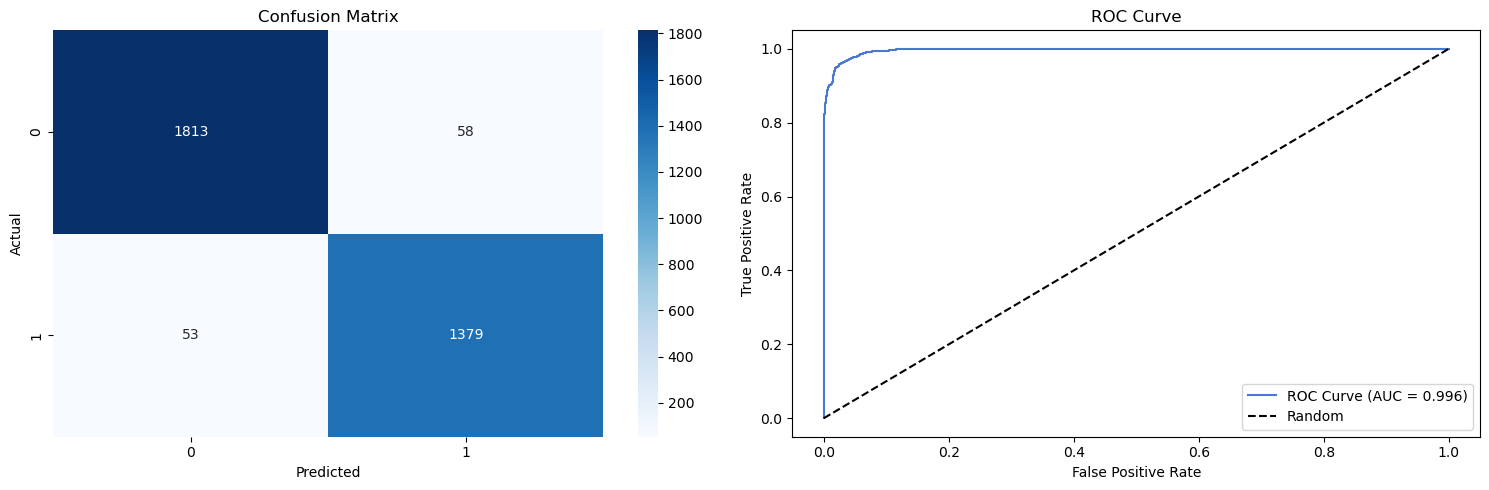

In [110]:
def make_predictions(model, X_test, y_test):

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    print("FINAL MODEL PERFORMANCE:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc:
        print(f"ROC-AUC: {roc_auc:.4f}")
    
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='Rotten')  # Specify positive label here
        axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
        axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('ROC Curve')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return y_pred, y_pred_proba

movie_df = make_predictions(model, X_test, y_test)

### 6.2) Create Standalone Model on Entire Training Dataset
Train the final model on the entire dataset.

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def create_final_model(X, y, best_algorithm):
    print("CREATE FINAL MODEL ON ENTIRE DATASET")

    final_model = best_algorithm.fit(X, y)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(final_model, X, y, cv=cv, scoring='accuracy')
    
    print(f"Final model trained on {X.shape[0]} samples")
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    return final_model

best_algorithm = RandomForestClassifier(random_state=42)
final_model = create_final_model(X, y, best_algorithm)


CREATE FINAL MODEL ON ENTIRE DATASET
Final model trained on 16513 samples
Cross-validation accuracy: 1.0000 (+/- 0.0000)


### 6.3) Save Model for Later Use
Save the trained model to a file.

In [124]:
import joblib
def save_model(model, feature_names, filename='movie_classification_model.pkl'):

    print("SAVE MODEL FOR LATER USE")
    
    model_data = {
        'model': model,
        'feature_names': selected_feature,
        'model_type': type(model).__name__
    }
    
    joblib.dump(model_data, filename)
    print(f"✅ Model saved as {filename}")
    print(f"Model type: {type(model).__name__}")
    print(f"Features saved: {feature_names}")

movie_df = save_model(model, selected_feature, filename='movie_classification_model.pkl')

SAVE MODEL FOR LATER USE
✅ Model saved as movie_classification_model.pkl
Model type: LogisticRegression
Features saved: ['tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count', 'audience_count', 'release_year', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
